In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize([0.5,], [0.5,])
                               ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

In [12]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10))

criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0],-1)

logits = model(images)

loss = criterion(logits,labels)

print(loss)

tensor(2.2997, grad_fn=<NllLossBackward>)


In [18]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))

images = images.view(images.shape[0],-1)

logp = model(images)

loss = criterion(logp,labels)

print(loss)

tensor(2.3050, grad_fn=<NllLossBackward>)


In [21]:
x = torch.randn(2,2, requires_grad = True)
print(x)

tensor([[ 8.3378e-04,  1.2234e+00],
        [-2.4207e+00, -1.0050e+00]], requires_grad=True)


In [22]:
y = x**2
print(y)

tensor([[6.9520e-07, 1.4966e+00],
        [5.8597e+00, 1.0100e+00]], grad_fn=<PowBackward0>)


In [23]:
print(y.grad_fn)

In [24]:
z = y.mean()
print(z)

tensor(2.0916, grad_fn=<MeanBackward0>)


In [25]:
print(x.grad)

None


In [26]:
z.backward()
print(x.grad)
print(x/2) # dz/dx = x/2

tensor([[ 4.1689e-04,  6.1168e-01],
        [-1.2103e+00, -5.0249e-01]])
tensor([[ 4.1689e-04,  6.1168e-01],
        [-1.2103e+00, -5.0249e-01]], grad_fn=<DivBackward0>)


In [2]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)

logp = model(images)
loss = criterion(logp,labels)

In [3]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)


Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0049,  0.0049,  0.0049,  ...,  0.0049,  0.0049,  0.0049],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [-0.0066, -0.0066, -0.0066,  ..., -0.0066, -0.0066, -0.0066]])


### Training a model (Single step)

In [4]:
from torch import optim

optimizer  = optim.SGD(model.parameters(), lr = 0.01)

In [5]:
model.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)>

In [6]:
print('Initial weight - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64,784)

optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output,labels)
loss.backward()
print('Gradient -', model[0].weight.grad)


Initial weight -  Parameter containing:
tensor([[ 0.0326,  0.0306,  0.0110,  ...,  0.0251,  0.0280,  0.0165],
        [-0.0180, -0.0182,  0.0349,  ..., -0.0097,  0.0132,  0.0187],
        [ 0.0074,  0.0195,  0.0029,  ..., -0.0287,  0.0084,  0.0077],
        ...,
        [ 0.0076, -0.0221,  0.0206,  ..., -0.0068, -0.0196, -0.0296],
        [-0.0059, -0.0027,  0.0212,  ..., -0.0048, -0.0328,  0.0080],
        [ 0.0051, -0.0353, -0.0231,  ..., -0.0150,  0.0321,  0.0304]],
       requires_grad=True)
Gradient - tensor([[-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0039,  0.0039,  0.0039,  ...,  0.0039,  0.0039,  0.0039],
        [ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        ...,
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0027,  0.0027,  0.0027,  ...,  0.0027,  0.0027,  0.0027]])


In [7]:
optimizer.step()
print('Updated weights', model[0].weight)

Updated weights Parameter containing:
tensor([[ 0.0326,  0.0306,  0.0110,  ...,  0.0251,  0.0281,  0.0165],
        [-0.0180, -0.0182,  0.0348,  ..., -0.0098,  0.0132,  0.0187],
        [ 0.0074,  0.0195,  0.0029,  ..., -0.0287,  0.0083,  0.0077],
        ...,
        [ 0.0075, -0.0221,  0.0206,  ..., -0.0068, -0.0196, -0.0296],
        [-0.0059, -0.0027,  0.0211,  ..., -0.0048, -0.0328,  0.0080],
        [ 0.0050, -0.0353, -0.0231,  ..., -0.0150,  0.0321,  0.0304]],
       requires_grad=True)


### Training a model(full)

In [5]:
from torch import optim

model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")
        

Training loss: 1.882084559148817
Training loss: 0.8501697639539552
Training loss: 0.5244155005732579
Training loss: 0.42781076832875004
Training loss: 0.3842552310622323


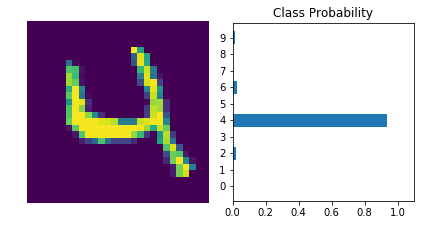

In [13]:
%matplotlib inline
import helper

images,labels = next(iter(trainloader))

img = images[0].view(1,784)

with torch.no_grad():
    logits = model.forward(img)
    
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1,28,28),ps)

0.43104612827301025